# Convolutional Neural Networks - Transfer Learning


This colab notebook is an introduction to popular Convolutional Neural Networks architecture and transfer learning.

pretrained models in keras documentation: https://keras.io/applications/

#### AlexNet, VGG, Google Inception, ResNet

All the architectures are coming from the famous ImageNet competiton and trained on ImageNet dataset, which has over 10mln 224x224x3 hand-labeled images drawn from 1000 categories.

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import (Dense,GlobalAveragePooling2D, Conv2D,
                          MaxPooling2D, AveragePooling2D, Flatten,Dropout,
                          concatenate, Input, BatchNormalization,
                          Activation, add, ZeroPadding2D) 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model,Sequential
from sklearn.datasets import load_files       
from tensorflow.keras import utils
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

from IPython.display import Image
import tensorflow as tf

#### AlexNet

![alt text](https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png)


AlexNet won the ImageNet competition in 2012 by a large margin and it was the first breakthrough since the beginning of the competition(2010).

It consists of 5 convolution layers and 3 Fully connected layers on the tail

Starts with big 11x11 convolution kernels and then reduces to 5x5 and then to 3x3. 

Dropout is applied before the first and the second fully connected layer.


And also various other techniques were used: 3 Overlapping MaxPooling layers, augmentation(That's why takes input 227x227 image in stead of 224x224) and Stochastic Gradient Descent with momentum.

In [0]:
def AlexNet(input_,num_of_classes):
    
    model = Sequential()
    
    #Convolutional layers
    model.add(Conv2D(96, (11,11), input_shape=np.shape(input_)[1:], strides = 4, padding='SAME', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='VALID'))
    
    model.add(Conv2D(256, (5,5), strides = 1, padding='SAME', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='VALID'))
    
    model.add(Conv2D(384, (3,3), strides = 1, padding='SAME', activation='relu'))
    
    model.add(Conv2D(384, (3,3), strides = 1, padding='SAME', activation='relu'))

    model.add(Conv2D(256, (3,3), strides = 1, padding='SAME', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='VALID'))
    
    model.add(Flatten())
    
    #Fully connected layers
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_of_classes, activation='softmax')) 

    # Return the complete AlexNet model
    return model

In [0]:
alexnet = AlexNet(np.zeros((1,227,227,3)),1000)
alexnet.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 57, 57, 96)        34944     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 13, 13, 256)      

#### VGGNet

![alt text](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)

Co-Author of the next breakthrough VGGNet was Armenian, Karen Simonyan. 

In 2014 their model showed the second best result in the ImageNet competition leaving ahead only Google Inception, which will be introduced next.

Here 3x3 convolution filters are used instead of like AlexaNet's big 11x11 kernels, because multiple small filters already cover the area of big ones and more filters help to learn more complex features, at a lower cost.

VGGNet is currently the most preferred choices for extracting features from images.

2 VGG networks are used VGG16 and VGG19, difference are networks' densities. Below you can see the implementation of VGG 16 network.

In [0]:
#@title VGG16 implemetation
def VGG16(input_,num_of_classes=1000):
    
    model = Sequential()
    
    #Convolutional layers
    model.add(Conv2D(64, (3, 3), 
                      input_shape=np.shape(input_)[1:],
                      activation='relu',
                      padding='same',
                      name='block1_conv1'))
    model.add(Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    
    model.add(Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1'))
    model.add(Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))


    model.add(Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1'))
    model.add(Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv2'))
    model.add(Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv1'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv2'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv1'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv2'))
    model.add(Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    #Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096,activation='relu')) 
    model.add(Dense(4096,activation='relu')) 
    model.add(Dense(num_of_classes, activation='softmax')) 

    #Return the VGG model
    return model

And here is a simple code that can load vgg16 already pretrained with the top fully connected layers and without.

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
vgg16_wtop = VGG16()
vgg16_wtop.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________

In [0]:
vgg16_wotop = VGG16(include_top = False)
vgg16_wotop.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

More about pretrained vgg: https://keras.io/applications/#vgg16

#### Google Inception

![alt text](https://cdn-images-1.medium.com/max/2600/1*ZFPOSAted10TPd3hBQU8iQ.png)

In 2014 the winner was Google Inception and after that also the architecture has been improved, and already the 4th version of the architecture has been released

Here We will cover the first version of Google's architecture.

![alt text](https://cdn-images-1.medium.com/max/1600/1*sezFsYW1MyM9YOMa1q909A.png)


Google Inception Architectures consists of inception layers, which is the concatination of 3 convolutional kernels'(1x1,3x3,5x5) and 3x3 max pooling. It covers bigger areas, but also keeps a fine resolution for small information on the images. So the idea is to convolve in parallel different sizes from the most accurate detailing (1x1) to a bigger one (5x5). 

Also it contains 1×1 Convolution at the middle of the network. And global average pooling is used at the end of the network instead of fully connected layers. 
1×1 convolution is used as a dimension reduction module to reduce the computation. By reducing the computation bottleneck, depth and width can be increased.
The architecture consisted of a 22 layer deep CNN but reduced the number of parameters from 60 million (AlexNet) to 4 million.

Deeper networks have the vanishing gradient problem (when the strength of gradient gradually dercreses due to small weights at the tails of sigmoid). Thus deeper networks might wash away crucial information about features. To remedy this problem, there were added "auxiliary classifiers" in two intermediate layers such that the final loss is a combination of the intermediate loss and the final loss. the losses are calculated with the same labels. Each auxiliary loss has 0.3 weight in final loss while last layer loss has weight of 1.

Without the use of 1×1 convolution: Number of operations = (14×14×48)×(5×5×480) = 112.9M<br>
With the use of 1×1 convolution: 
Number of operations for 1×1 = (14×14×16)×(1×1×480) = 1.5M<br>
Number of operations for 5×5 = (14×14×48)×(5×5×16) = 3.8M<br>
Total number of operations = 1.5M + 3.8M = 5.3M < 112.9M

#### Inception V3

In [0]:
Image(url='https://cdn-images-1.medium.com/max/1200/1*gqKM5V-uo2sMFFPDS84yJw.png',width=750) 

In the version 3 some changes have been done to improve speed and accuracy

1) Factorized 5x5 convolution to two 3x3 convolution operations to improve computational speed. Because a 5x5 convolution is 2.78 times more expensive than a 3x3 convolution. Stacking two 3x3 convolutions reduced number of parameters by 28% and leads to a boost in performance.

2) Factorized into asymmetric convolutions. One 3×1 convolution followed by one 1×3 convolution replaces one 3×3 convolution as follows:

    By using 3×3 filter, number of parameters = 3×3=9,
    
    By using 3×1 and 1×3 filters, number of parameters = 3×1+1×3=6
    
    So Number of parameters is reduced by 33%
    
3) Only 1 auxiliary classifier is used on the top of the last 17×17 layer, instead of using 2 auxiliary classifiers. In Inception-v1 Auxiliary classifiers are used for having deeper network. In Inception-v3, auxiliary classifier is used as regularizer. But for simplicity below we will build the model without auxiliary classifier.

In [0]:
#@title Inception V3 implentation

def conv2d_bn(x,filters,num_row,num_col,padding='same',strides=(1, 1)):
       
    x = Conv2D(filters, (num_row, num_col),strides=strides,padding=padding,use_bias=False)(x)
    x = BatchNormalization(axis=3, scale=False)(x)
    x = Activation('relu')(x)
    
    return x

def InceptionV3(input_,classes=1000):
     
    inputs = Input(shape=(299,299,3))
    
    x = conv2d_bn(inputs, 32, 3, 3, strides=(2, 2), padding='valid')
    x = conv2d_bn(x, 32, 3, 3, padding='valid')
    x = conv2d_bn(x, 64, 3, 3)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, 1, 1, padding='valid')
    x = conv2d_bn(x, 192, 3, 3, padding='valid')
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # mixed 0: 35 x 35 x 256
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
    
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=3)

    # mixed 1: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=3)

    # mixed 2: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=3)

    # mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(
        branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate(
        [branch3x3, branch3x3dbl, branch_pool],
        axis=3)

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 128, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=3)

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn(x, 192, 1, 1)

        branch7x7 = conv2d_bn(x, 160, 1, 1)
        branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=3,
            name='mixed' + str(5 + i))

    # mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 192, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 192, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=3)

    # mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn(x, 192, 1, 1)
    branch3x3 = conv2d_bn(branch3x3, 320, 3, 3,
                          strides=(2, 2), padding='valid')

    branch7x7x3 = conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn(
        branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate(
        [branch3x3, branch7x7x3, branch_pool],
        axis=3)

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn(x, 320, 1, 1)

        branch3x3 = conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = concatenate(
            [branch3x3_1, branch3x3_2],
            axis=3)

        branch3x3dbl = conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = concatenate(
            [branch3x3dbl_1, branch3x3dbl_2], axis=3)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = concatenate(
            [branch1x1, branch3x3, branch3x3dbl, branch_pool],
            axis=3)
        
    x = GlobalAveragePooling2D(name='avg_pool')(x)
    
    # Fully connected layer
    x = Dense(classes, activation='softmax', name='predictions')(x)
    
    
    model = Model(inputs, x, name='inception_v3')
    
    return model

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
inceptionV3_wotop = InceptionV3(include_top = False)
inceptionV3_wotop.summary()

87916544/87910968 [==============================] - 4s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________

more about pretrained inception: https://keras.io/applications/#inceptionv3

#### ResNet 
Residual neural network

![alt text](https://cdn-images-1.medium.com/max/1600/1*beczGvPaBBnyauKItYGTYQ.png)

Network architectures need to go deeper, however, increasing network depth does not work by simply stacking layers together. Deeper neural networks are more difficult to train because of the vanishing gradient problem, as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient infinitively small.

Residual learning framework eases the training of networks that are substantially deeper than those used previously. In the network each layer feeds into the next layer and directly into the layers about 2–3 hops away, so that gradient signal has a shorter route to travel.

ResNet was also inspired from identity problem. NN-s have dificulty replicating the input, so by adding the input to another hidden layer it forces to learn the residual, which in identity problem is effectively 0. Learning that way NN can easily map input to the same output.

![alt text](https://cdn-images-1.medium.com/max/1200/1*ByrVJspW-TefwlH7OLxNkg.png)

In [0]:
#@title ResNet50 Implementation

def identity_block(input_tensor, kernel_size, filters):

    filters1, filters2, filters3 = filters

    x = Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)

    x = add([x, input_tensor])
    x = Activation('relu')(x)
    
    return x
    

def conv_block(input_tensor,kernel_size,filters,strides=(2, 2)):
    
    filters1, filters2, filters3 = filters


    x = Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal')(input_tensor)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal')(input_tensor)
    shortcut = BatchNormalization(
        axis=3)(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x    


def ResNet50(input_,classes=1000):

    inputs = Input(shape=np.shape(input_)[1:])


    x = ZeroPadding2D(padding=(3, 3))(inputs)
    x = Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])

    x = conv_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])

    x = conv_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])

    x = conv_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])

    x = GlobalAveragePooling2D()(x)
    x = Dense(classes, activation='softmax')(x)

    model = Model(inputs, x, name='resnet50')


    return model

In [0]:
from tensorflow.keras.applications.resnet import ResNet50

In [0]:
resnet_wotop = ResNet50(include_top = False)
resnet_wotop.summary()

94773248/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
__________________________

More about pretrained resnet: https://keras.io/applications/#resnet

## Transfer Learning

Transfer learning is a machine learning technique, where knowledge gain during training in one type of problem is used to train in other similar type of problem.

Usually training requires a lot of time and you don't have enough computing power and time or don't have enough labeled data to train your network. 
For this cases instead of building your own network and enduring training epoch after training epoch, you can take an already trained network: trained on a similar task, and adapt the network for your task. 

![alt text](https://cdn.elearningindustry.com/wp-content/uploads/2016/09/5-tips-improve-knowledge-transfer-elearning-e1475138920743.jpeg)

As CNNs try to find features in convolutional layers, those layers are usually kept unchanged, and last few fully connected layers are replaced with new ones, which will be trained

There are 2 common approaches to transfer learning.

#### Pre-trained model approach

1) Find a pre-trained model: There're many public pre-trained models are available trained on challenging, large datasets, from which you can choose one.

2) Then the pre-trained model(as a whole or parts of it) can be used as a starting point to the second task of interest

3) Also there might be need to adapt or refine parts of model, to meet input and output requirements.


#### Develop model approach

If you don't have enough data to train your model, but other related data is available, you can pre-train your model on available dataset, then continue with the above mentioned 2nd and 3rd points

Bellow see the accuracy of various architectures depending on number of operations

![alt text](https://cdn-images-1.medium.com/max/1600/1*A0JzlOwTokGwhcBhT89tDQ.png)

Current SOTA on ImageNet: https://paperswithcode.com/sota/image-classification-on-imagenet

Now lets build a classifier which predicts yoda or darth vader. (we can easily change the pictures by slightly modifying codes below)

Search for term __python bulk download images from google__ in google. After opening some links the following link https://stackoverflow.com/questions/35809554/how-to-download-google-image-search-results-in-python leads to **a very nice** library called _icrawler_. The library has crawl download for google, baidu and many more. 

In [0]:
from icrawler.builtin import GoogleImageCrawler, GreedyImageCrawler

In [0]:
path_yoda = 'data/yoda/'
path_vader = 'data/vader/'

In [136]:
# download images of yoda
google_crawler = GoogleImageCrawler(feeder_threads=1,
                                    parser_threads=1, 
                                    downloader_threads=4,
                                    storage={'root_dir': path_yoda})
google_crawler.crawl(keyword='luke skywalker', max_num=100)

2019-12-04 16:40:19,709 - INFO - icrawler.crawler - start crawling...
2019-12-04 16:40:19,719 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-04 16:40:19,721 - INFO - feeder - thread feeder-001 exit
2019-12-04 16:40:19,722 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-04 16:40:19,726 - INFO - icrawler.crawler - starting 4 downloader threads...
2019-12-04 16:40:20,263 - INFO - parser - parsing result page https://www.google.com/search?q=luke+skywalker&ijn=0&start=0&tbs=&tbm=isch
2019-12-04 16:40:20,414 - INFO - downloader - image #1	https://lumiere-a.akamaihd.net/v1/images/luke-skywalker-main_5a38c454_461eebf5.jpeg?region=0%2C0%2C1536%2C864&width=960
2019-12-04 16:40:20,424 - INFO - downloader - image #2	https://lumiere-a.akamaihd.net/v1/images/luke-skywalker-i-am-a-jedi_fce1d84d.jpeg?region=204%2C0%2C414%2C413
2019-12-04 16:40:20,425 - INFO - downloader - image #3	https://www.sideshow.com/storage/product-images/903109/luke-skywalker_star-wars_feature

In [137]:
# download iamges of vader
google_crawler = GoogleImageCrawler(feeder_threads=1,
                                    parser_threads=1, 
                                    downloader_threads=4,
                                    storage={'root_dir': path_vader})
google_crawler.crawl(keyword='obiwan', max_num=100)

2019-12-04 16:40:33,786 - INFO - icrawler.crawler - start crawling...
2019-12-04 16:40:33,787 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-12-04 16:40:33,789 - INFO - feeder - thread feeder-001 exit
2019-12-04 16:40:33,789 - INFO - icrawler.crawler - starting 1 parser threads...
2019-12-04 16:40:33,795 - INFO - icrawler.crawler - starting 4 downloader threads...
2019-12-04 16:40:34,636 - INFO - parser - parsing result page https://www.google.com/search?q=obiwan&ijn=0&start=0&tbs=&tbm=isch
2019-12-04 16:40:34,778 - INFO - downloader - image #1	https://www.esquireme.com/sites/default/files/styles/full_img/public/images/2019/09/02/obi-wan-show-1567178968.jpg?itok=wsXM9Wmp
2019-12-04 16:40:34,780 - INFO - downloader - image #2	https://cdn2us.denofgeek.com/sites/denofgeekus/files/styles/main_wide/public/2019/08/ewan-mcregor-obi-wan-kenobi-star-wars-disney-tv-series.jpg?itok=4FNDeMbf
2019-12-04 16:40:34,822 - INFO - downloader - image #3	https://img.cinemablend.com/filter:sc

In [0]:
yoda_pics = os.listdir(path_yoda)
vader_pics = os.listdir(path_vader)

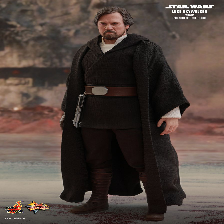

In [139]:
load_img(path_yoda+yoda_pics[0], target_size=(224, 224))

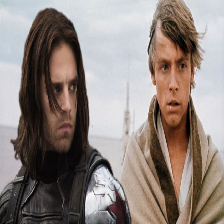

In [140]:
load_img(path_yoda+yoda_pics[16], target_size=(224, 224))

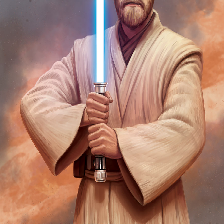

In [141]:
load_img(path_vader+vader_pics[0], target_size=(224, 224))

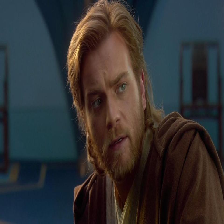

In [142]:
load_img(path_vader+vader_pics[10], target_size=(224, 224))

In [187]:
X = []
y = []
for file in tqdm(yoda_pics):
    #Load image and convert them to arrays
    #Divide by 255 to bring data to the scale from 0 to 1
    img = img_to_array(load_img(path_yoda+file, target_size=(331, 331))) / 255.0

    X.append(img.tolist())
    y.append('yoda')

for file in tqdm(vader_pics):
    #Load image and convert them to arrays
    #Divide by 255 to bring data to the scale from 0 to 1
    img = img_to_array(load_img(path_vader+file, target_size=(331, 331))) / 255.0

    X.append(img.tolist())
    y.append('vader')

#Convert target to dummy variables
lb = LabelBinarizer()
lb.fit(y)

Y = lb.transform(y)

In [0]:
# split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,shuffle = True,test_size = 0.3)

In [0]:
from tensorflow.keras.applications.nasnet import NASNetLarge

In [0]:
# get pretrained model
pretrained_model = NASNetLarge(include_top = False, input_shape = (331,331,3))

In [0]:
# make the pretrained part untrainable
pretrained_model.trainable = False

In [0]:
# add a dense layer with 128 neurons and an output layer
last = pretrained_model.output
flat = Flatten()(last)
fc = Dense(512, activation='relu')(flat)
fc = Dropout(0.5)(fc)
fc = Dense(512, activation='relu')(fc)
fc = Dropout(0.5)(fc)
output = Dense(1, activation='sigmoid')(fc)

model = Model(pretrained_model.input, output)

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])


In [200]:
# train model
model.fit(np.array(X_train),np.array(Y_train), epochs=10,
          batch_size=32, validation_split=0.15,
          verbose=1,shuffle=True)

Train on 117 samples, validate on 21 samples
Epoch 1/10
117/117 [==============================] - 35s 302ms/sample - loss: 17.0762 - acc: 0.5214 - val_loss: 48.9006 - val_acc: 0.3810
Epoch 2/10
117/117 [==============================] - 11s 95ms/sample - loss: 21.9344 - acc: 0.6923 - val_loss: 14.7655 - val_acc: 0.6190
Epoch 3/10
117/117 [==============================] - 11s 94ms/sample - loss: 20.3041 - acc: 0.7094 - val_loss: 32.0142 - val_acc: 0.3810
Epoch 4/10
117/117 [==============================] - 11s 94ms/sample - loss: 13.1378 - acc: 0.8034 - val_loss: 12.5658 - val_acc: 0.6190
Epoch 5/10
117/117 [==============================] - 11s 94ms/sample - loss: 8.4197 - acc: 0.8632 - val_loss: 8.3377 - val_acc: 0.7619
Epoch 6/10
117/117 [==============================] - 11s 94ms/sample - loss: 2.4522 - acc: 0.9316 - val_loss: 13.3806 - val_acc: 0.6667
Epoch 7/10
117/117 [==============================] - 11s 94ms/sample - loss: 1.7076 - acc: 0.9573 - val_loss: 27.8157 - val_acc:

In [201]:
# Evaluate the model on tet set
model.evaluate(np.array(X_test),np.array(Y_test))

60/60 [==============================] - 6s 95ms/sample - loss: 19.2867 - acc: 0.6667


[19.286702473958332, 0.6666667]

In [0]:
# get predictions on test set
pred = model.predict(np.array(X_test))

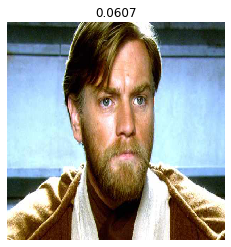

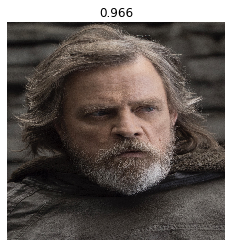

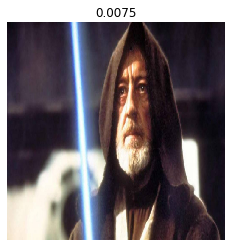

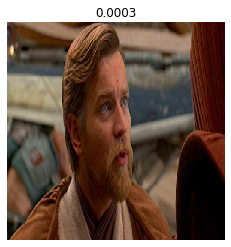

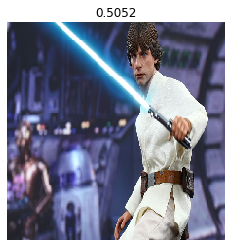

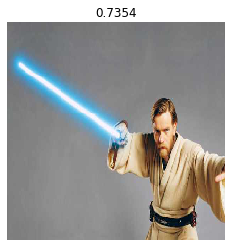

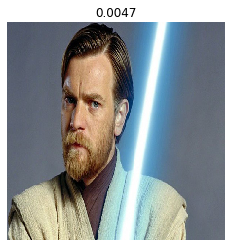

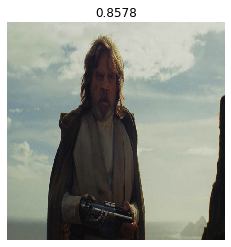

In [158]:
# visualize the predictions
for k in [0,5,7,18,23,59,25,21,]:
  plt.imshow((np.array(X_test[k])*255).astype('uint8'))
  plt.axis('off')
  plt.title(pred.round(4)[k][0])
  plt.show()